In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
from mle_toolbox import load_result_logs
from mle_toolbox.visualize import visualize_2D_grid

import os
import sys

sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt

# AlexNet - MLP - 20 BO Iters

In [3]:
experiment_dir = "../experiments/mlp_alexnet_bo_20"
meta_log, hyper_log = load_result_logs(experiment_dir)

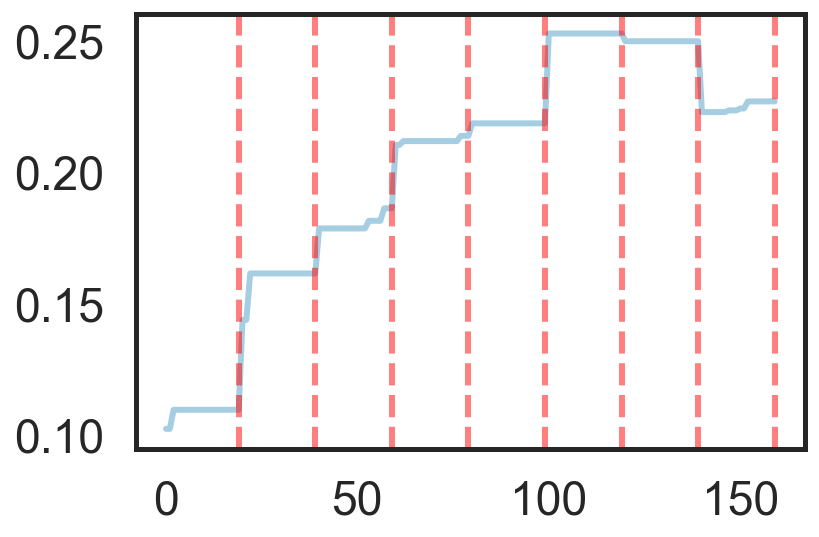

In [31]:
plt.plot(np.arange(160), meta_log.b_1_eval_0.stats.best_bo_score.mean)
num_bo_per_layer = 20
for i in range(8):
    plt.axvline(19 + i*20, ls="--", c="red", alpha=0.5)


(<Figure size 720x576 with 2 Axes>,
 <AxesSubplot:title={'center':'MLP Encoder - Best AlexNet Layer'}, xlabel='Region of Interest', ylabel='Subject ID'>)

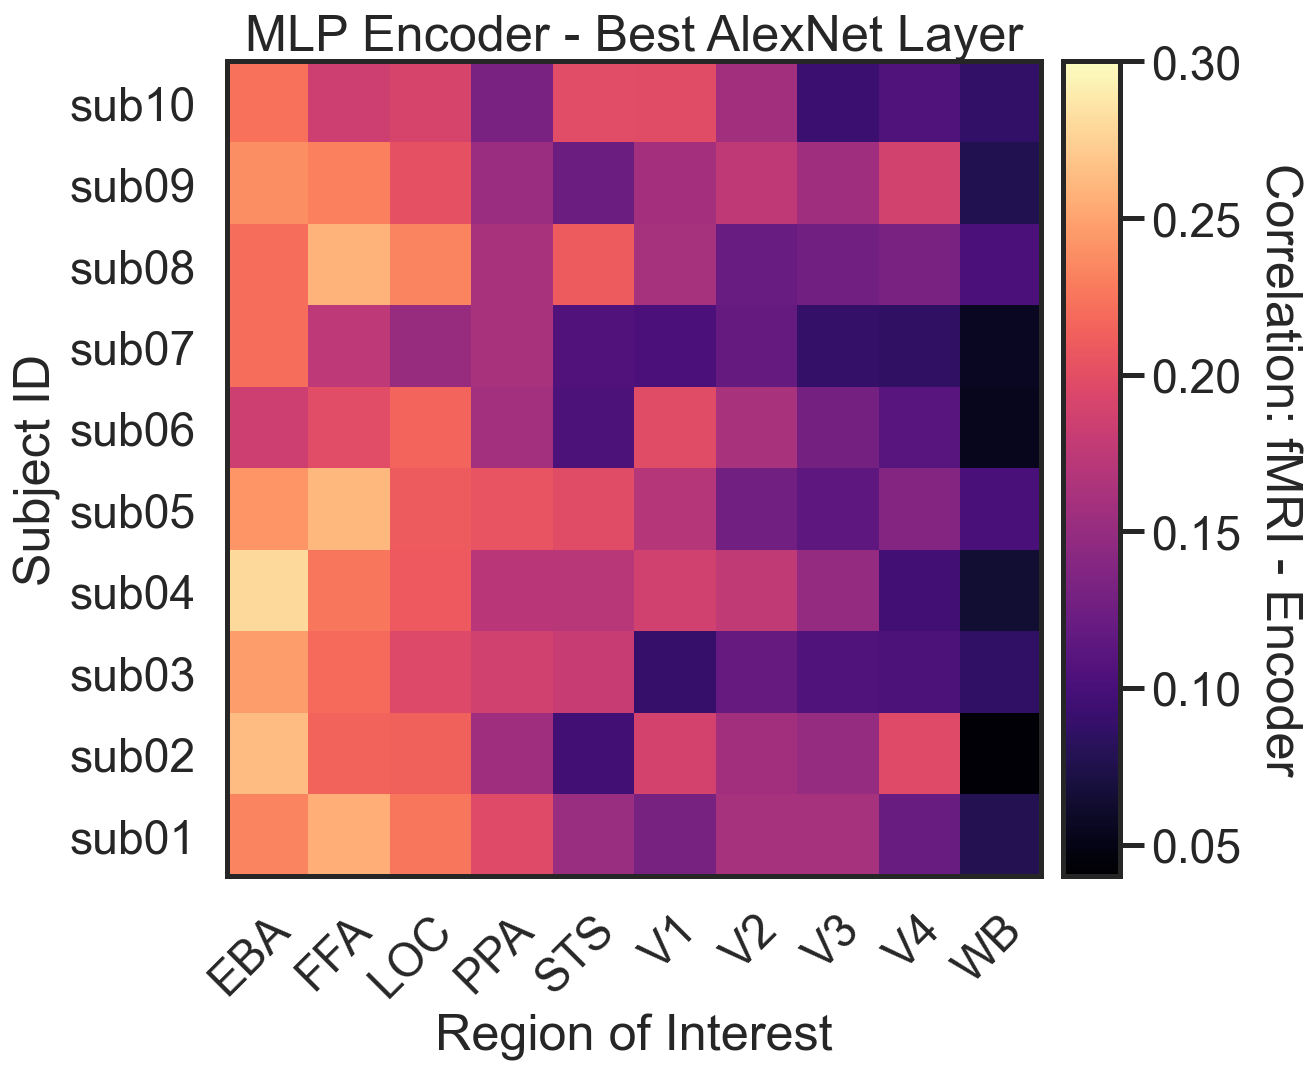

In [32]:
visualize_2D_grid(hyper_log,
                  params_to_plot=["roi_type", "subject_id"],
                  target_to_plot="best_bo_score",
                  plot_title="MLP Encoder - Best AlexNet Layer",
                  xy_labels=["Region of Interest", "Subject ID"],
                  variable_name="Correlation: fMRI - Encoder",
                  min_heat=0.04, max_heat=0.3)

Text(0.5, 1.0, 'Subject-Meaned Correlation: fMRI - Encoder')

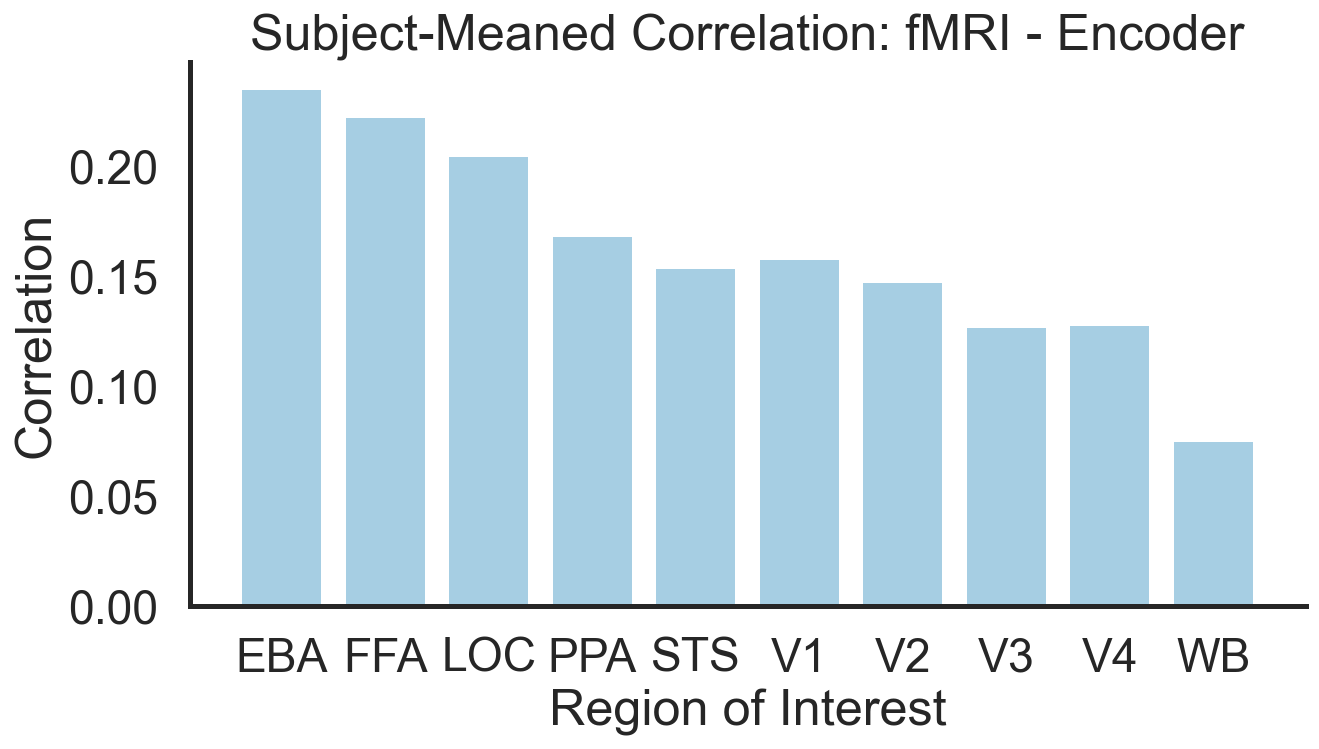

In [36]:
heat_array, range_x, range_y = visualize_2D_grid(hyper_log,
                                                 params_to_plot=["roi_type", "subject_id"],
                                                 target_to_plot="best_bo_score",
                                                 return_array=True)
region_sub_mean = heat_array.mean(axis=0)
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(range_x, region_sub_mean)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Region of Interest")
ax.set_ylabel("Correlation")
ax.set_title("Subject-Meaned Correlation: fMRI - Encoder")

Text(0.5, 1.0, 'ROI-Meaned Correlation: fMRI - Encoder')

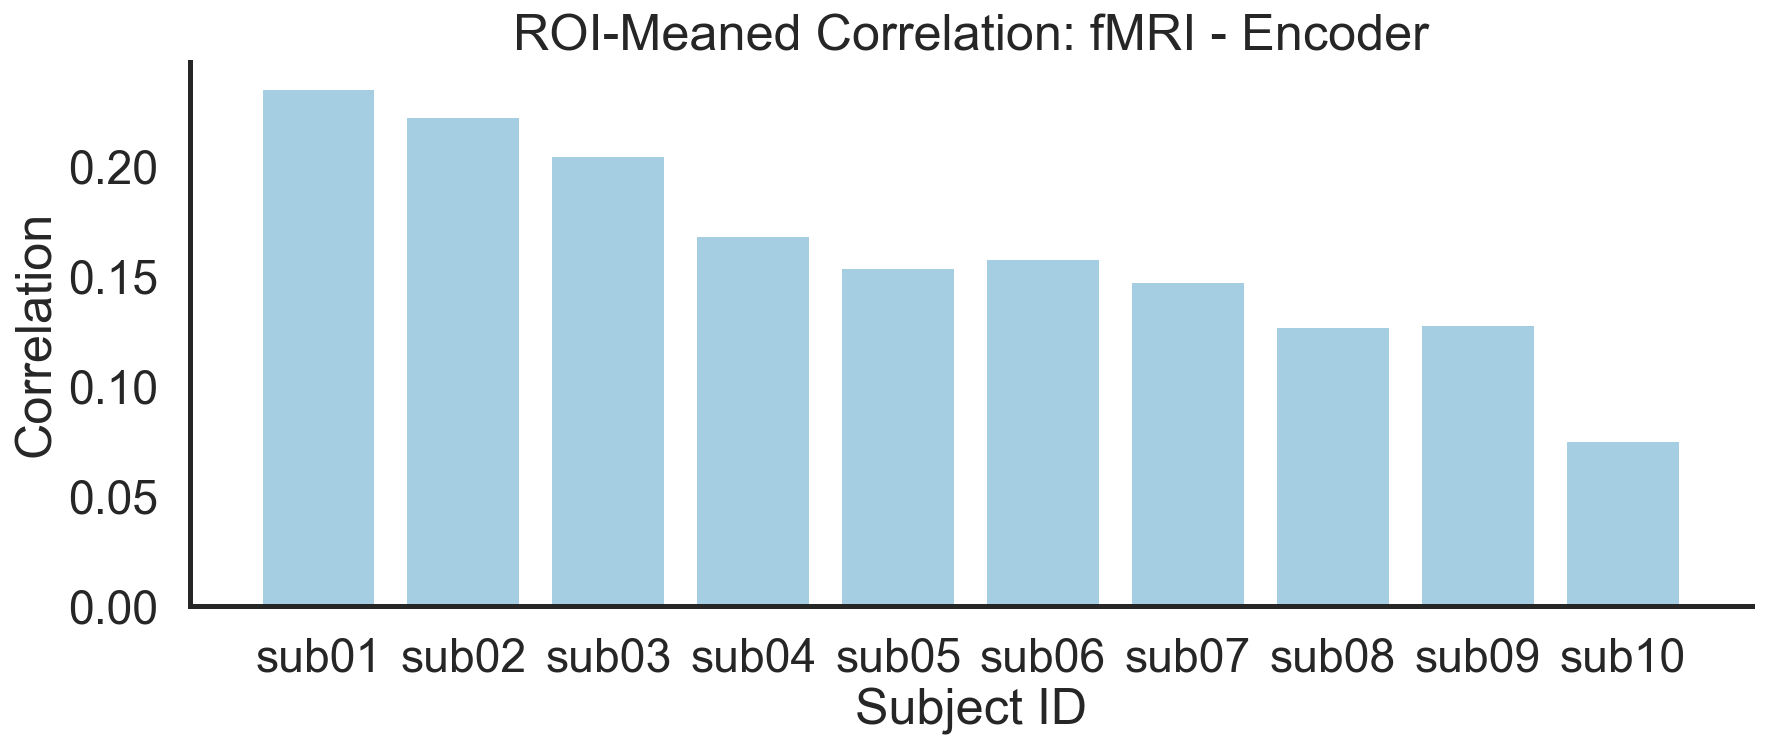

In [37]:
region_roi_mean = heat_array[:, :-1].mean(axis=1)
fig, ax = plt.subplots(figsize=(14,5))
ax.bar(range_y, region_sub_mean)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Subject ID")
ax.set_ylabel("Correlation")
ax.set_title("ROI-Meaned Correlation: fMRI - Encoder")

In [38]:
# Sort scores for spreadsheet storage
idx = []
for v in ["V1", "V2", "V3", "V4", "LOC", "EBA", "FFA", "STS", "PPA", "WB"]:
    idx.append(np.where(range_x == v)[0][0])
region_sub_mean[idx]

array([0.1581399 , 0.14765818, 0.12733331, 0.12792469, 0.20487078,
       0.23539341, 0.22248714, 0.15408887, 0.16865384, 0.07521167])